# **Credit Scoring and Segmentation**

## Import the necessary Python libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(color_codes=True)

import warnings
warnings.filterwarnings('ignore')

## Reading the dataset

Data downloaded from https://statso.io/credit-scoring-case-study/

In [2]:
data = pd.read_csv("credit_scoring.csv")
print(data.head())

   Age  Gender Marital Status Education Level Employment Status  \
0   60    Male        Married          Master          Employed   
1   25    Male        Married     High School        Unemployed   
2   30  Female         Single          Master          Employed   
3   58  Female        Married             PhD        Unemployed   
4   32    Male        Married        Bachelor     Self-Employed   

   Credit Utilization Ratio  Payment History  Number of Credit Accounts  \
0                      0.22           2685.0                          2   
1                      0.20           2371.0                          9   
2                      0.22           2771.0                          6   
3                      0.12           1371.0                          2   
4                      0.99            828.0                          2   

   Loan Amount  Interest Rate  Loan Term   Type of Loan  
0      4675000           2.65         48  Personal Loan  
1      3619000           5.19 

Description of all the features in the data:

**Age**: This feature represents the age of the individual.

**Gender**: This feature captures the gender of the individual.

**Marital Status**: This feature denotes the marital status of the individual.

**Education Level**: This feature represents the highest level of education attained by the individual.

**Employment Status**: This feature indicates the current employment status of the individual.

**Credit Utilization Ratio**: This feature reflects the ratio of credit used by the individual compared to their total available credit limit.

**Payment History**: It represents the monthly net payment behaviour of each customer, taking into account factors such as on-time payments, late payments, missed payments, and defaults.

**Number of Credit Accounts**: It represents the count of active credit accounts the person holds.

**Loan Amount**: It indicates the monetary value of the loan.

**Interest Rate**: This feature represents the interest rate associated with the loan.

**Loan Term**: This feature denotes the duration or term of the loan.

**Type of Loan**: It includes categories like “Personal Loan,” “Auto Loan,” or potentially other types of loans.

## Descriptive statistics of data

### Data types

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   Gender                     1000 non-null   object 
 2   Marital Status             1000 non-null   object 
 3   Education Level            1000 non-null   object 
 4   Employment Status          1000 non-null   object 
 5   Credit Utilization Ratio   1000 non-null   float64
 6   Payment History            1000 non-null   float64
 7   Number of Credit Accounts  1000 non-null   int64  
 8   Loan Amount                1000 non-null   int64  
 9   Interest Rate              1000 non-null   float64
 10  Loan Term                  1000 non-null   int64  
 11  Type of Loan               1000 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


### Statistics

In [4]:
data.describe()

,Age,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,42.702000,0.509950,1452.814000,5.580000,2.471401e+06,10.686600,37.128000
std,13.266771,0.291057,827.934146,2.933634,1.387047e+06,5.479058,17.436274
min,20.000000,0.000000,0.000000,1.000000,1.080000e+05,1.010000,12.000000
25%,31.000000,0.250000,763.750000,3.000000,1.298000e+06,6.022500,24.000000
50%,42.000000,0.530000,1428.000000,6.000000,2.437500e+06,10.705000,36.000000
75%,54.000000,0.750000,2142.000000,8.000000,3.653250e+06,15.440000,48.000000
max,65.000000,1.000000,2857.000000,10.000000,4.996000e+06,19.990000,60.000000


## Data Visualization

### Distribution of the credit utilization ratio

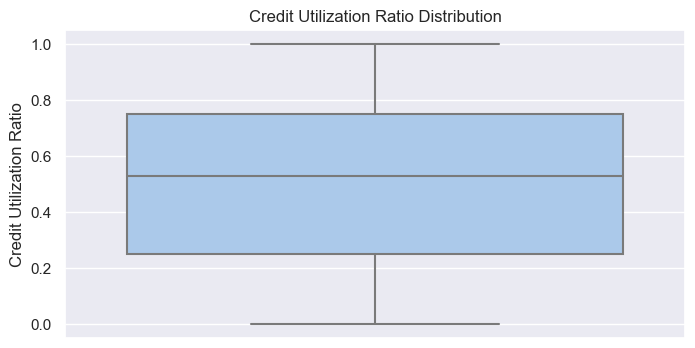

In [5]:
palette = sns.color_palette("pastel")

# Box plot for Credit Utilization Ratio
plt.figure(figsize=(8, 4))
sns.boxplot(data=data, y='Credit Utilization Ratio', palette=palette)
plt.title('Credit Utilization Ratio Distribution')
plt.show()

### Distribution of the loan amount

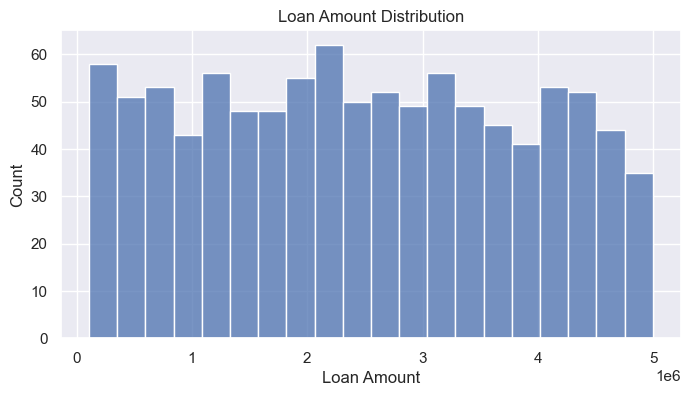

In [6]:
# Histogram for Loan Amount
plt.figure(figsize=(8, 4))
sns.histplot(data=data, x='Loan Amount', bins=20, palette=palette)
plt.title('Loan Amount Distribution')
plt.show()

### Correlation

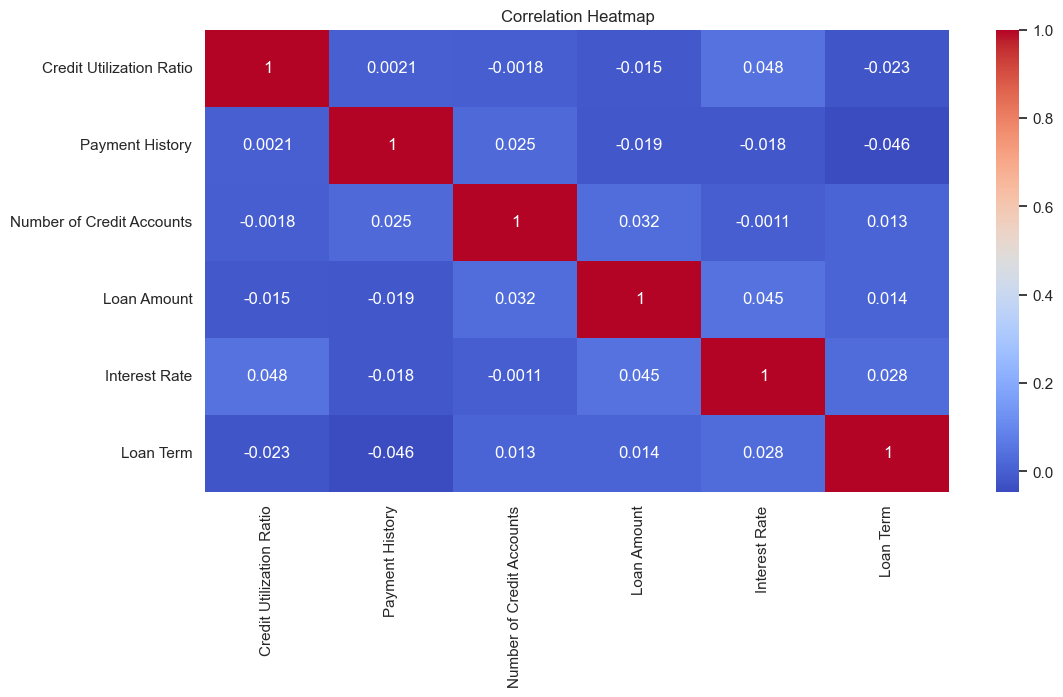

In [7]:
# Correlation Heatmap
numeric_df = data[['Credit Utilization Ratio', 'Payment History', 'Number of Credit Accounts', 'Loan Amount', 'Interest Rate', 'Loan Term']]
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()

## Calculating Credit Scores

In [8]:
# Define the mapping for categorical features
education_level_mapping = {'High School': 1, 'Bachelor': 2, 'Master': 3, 'PhD': 4}
employment_status_mapping = {'Unemployed': 0, 'Employed': 1, 'Self-Employed': 2}

# Apply mapping to categorical features
data['Education Level'] = data['Education Level'].map(education_level_mapping)
data['Employment Status'] = data['Employment Status'].map(employment_status_mapping)

# Calculate credit scores using the complete FICO formula
credit_scores = []

for index, row in data.iterrows():
    payment_history = row['Payment History']
    credit_utilization_ratio = row['Credit Utilization Ratio']
    number_of_credit_accounts = row['Number of Credit Accounts']
    education_level = row['Education Level']
    employment_status = row['Employment Status']

    # Apply the FICO formula to calculate the credit score
    credit_score = (payment_history * 0.35) + (credit_utilization_ratio * 0.30) + (number_of_credit_accounts * 0.15) + (education_level * 0.10) + (employment_status * 0.10)
    credit_scores.append(credit_score)

# Add the credit scores as a new column to the DataFrame
data['Credit Score'] = credit_scores

print(data.head())

   Age  Gender Marital Status  Education Level  Employment Status  \
0   60    Male        Married                3                  1   
1   25    Male        Married                1                  0   
2   30  Female         Single                3                  1   
3   58  Female        Married                4                  0   
4   32    Male        Married                2                  2   

   Credit Utilization Ratio  Payment History  Number of Credit Accounts  \
0                      0.22           2685.0                          2   
1                      0.20           2371.0                          9   
2                      0.22           2771.0                          6   
3                      0.12           1371.0                          2   
4                      0.99            828.0                          2   

   Loan Amount  Interest Rate  Loan Term   Type of Loan  Credit Score  
0      4675000           2.65         48  Personal Loan       

We have used the FICO score method to calculate credit scores.

Within the iteration, the FICO formula is applied to calculate the credit score for each individual. The formula incorporates the weighted values of the features mentioned earlier: 

1. 35% weight for “Payment History”, 
2. 30% weight for “Credit Utilization Ratio”, 
3. 15% weight for “Number of Credit Accounts”, 
4. 10% weight for “Education Level”, 
5. 10% weight for “Employment Status”. 

### Segmentation Based on Credit Scores

In [9]:
from sklearn.cluster import KMeans

X = data[['Credit Score']]
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans.fit(X)
data['Segment'] = kmeans.labels_

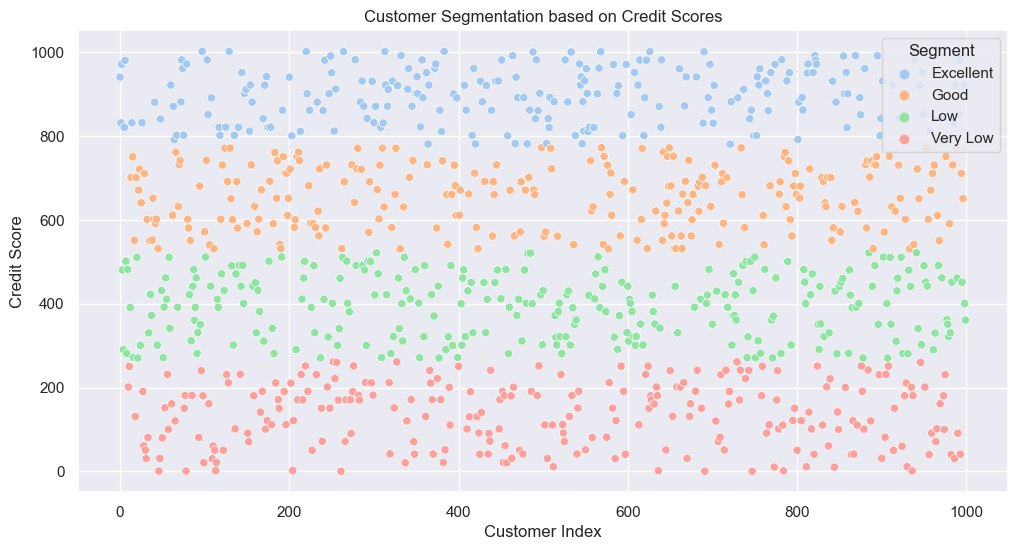

In [10]:
# Mapping the segment labels to descriptive names
data['Segment'] = data['Segment'].map({2: 'Very Low', 0: 'Low', 1: 'Good', 3: 'Excellent'})

# Convert the 'Segment' column to category data type
data['Segment'] = data['Segment'].astype('category')

# Set the pastel color palette
palette = sns.color_palette("pastel")

# Create the scatter plot using Seaborn
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x=data.index, y='Credit Score', hue='Segment', palette=palette)
plt.xlabel('Customer Index')
plt.ylabel('Credit Score')
plt.title('Customer Segmentation based on Credit Scores')
plt.show()